In [7]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from collections import Counter

#[1] Importing dataset

dataset = pd.read_json(r"C:\Users\Panos\Desktop\Dissert\Code\Video_Games_5.json", lines=True, encoding='latin-1')
dataset = dataset[['reviewText','overall']]

#[2] Reduce number of classes

ratings = []
for index,entry in enumerate(dataset['overall']):
    if entry == 1.0 or entry == 2.0:
        ratings.append(-1)
    elif entry == 3.0:
        ratings.append(0)
    elif entry == 4.0 or entry == 5.0:
        ratings.append(1)

In [8]:
#[3] Cleaning the text
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
import string
import operator
import sys
import nltk
import re

corpus = []

for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['reviewText'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    
    # Keep the adjectives using nltk
    tokens = nltk.word_tokenize(str(review))
    tags = nltk.pos_tag(tokens)
    adjectives_adverbs = [word for word,pos in tags if (pos == 'JJ' or pos == 'IN')]
    review_adjectives_adverbs = " ".join(adjectives_adverbs)
    
    corpus.append(review_adjectives_adverbs)

In [9]:
#[4] Prepare Train and Test Data sets
            
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(corpus,ratings,test_size=0.3)

print(Counter(Train_Y).values()) # counts the elements' frequency

dict_values([19837, 122426, 19983])


In [10]:
#[5] Encoding

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [11]:
#[6] Word Vectorization
        
Hashing_vect = HashingVectorizer(alternate_sign=False)
Hashing_vect.fit(corpus)
Train_X_Hashing = Hashing_vect.transform(Train_X)
Test_X_Hashing = Hashing_vect.transform(Test_X)

In [12]:
#[8] Use the Support Vector Machine Algorithms to Predict the outcome

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Hashing,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Hashing)

# Use accuracy_score function to get the accuracy
print("-----------------Support Vector Machine CM------------------\n")
print("Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Test_Y, predictions_SVM)
print("\n",cm,"\n")
# Printing a classification report of different metrics
from sklearn.metrics import classification_report
my_tags = ['Positive','Neutral','Negative']
print(classification_report(Test_Y, predictions_SVM,target_names=my_tags))

# Export reports to files for later visualizations
report_SVM = classification_report(Test_Y, predictions_SVM,target_names=my_tags, output_dict=True)
report_SVM_df = pd.DataFrame(report_SVM).transpose()
report_SVM_df.to_csv(r'SVM_report_HashingVect_Adjectives_Adverbs.csv', index = True, float_format="%.3f")

-----------------Support Vector Machine CM------------------

Accuracy Score ->  78.41775246641932

 [[ 2665     0  5868]
 [  845     1  7592]
 [  702     0 51861]] 

              precision    recall  f1-score   support

    Positive       0.63      0.31      0.42      8533
     Neutral       1.00      0.00      0.00      8438
    Negative       0.79      0.99      0.88     52563

    accuracy                           0.78     69534
   macro avg       0.81      0.43      0.43     69534
weighted avg       0.80      0.78      0.72     69534



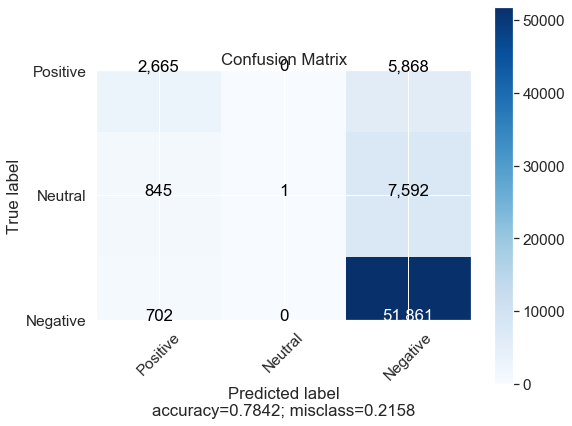

In [21]:
import numpy as np
#https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(cm = np.array([[ 2665,     0,  5868,],
                                     [  845,     1,  7592,],
                                     [  702,     0, 51861]] ), 
                      normalize    = False,
                      target_names = ['Positive','Neutral','Negative'],
                      title        = "Confusion Matrix")